In [2]:
## Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
## reading the data
housing_df = pd.read_csv('data/housing.csv')

EDA

In [4]:
## Display first few rows of the data
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
## Check for missing values
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
## Summary statistics
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


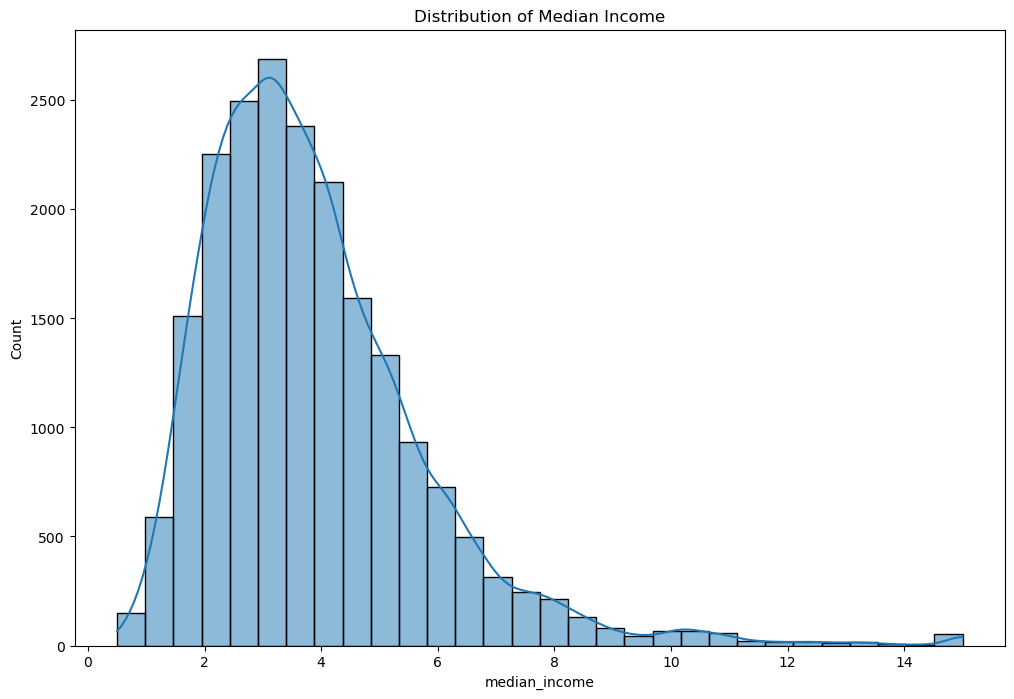

In [7]:
## Visualize distributions of some features
plt.figure(figsize=(12, 8))
sns.histplot(housing_df['median_income'], bins=30, kde=True)
plt.title("Distribution of Median Income")
plt.show()

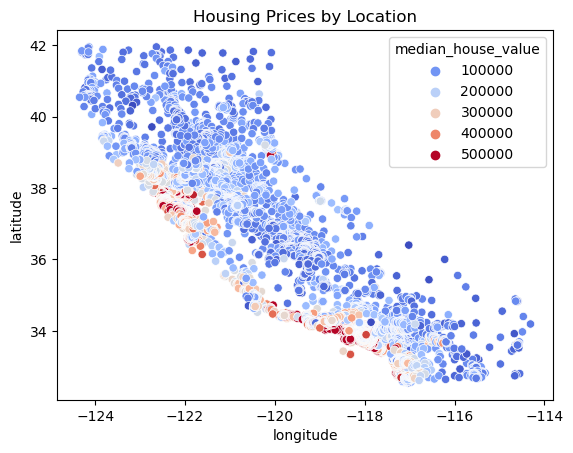

In [8]:
sns.scatterplot(data=housing_df, x="longitude", y="latitude", hue="median_house_value", palette="coolwarm")
plt.title("Housing Prices by Location")
plt.show()

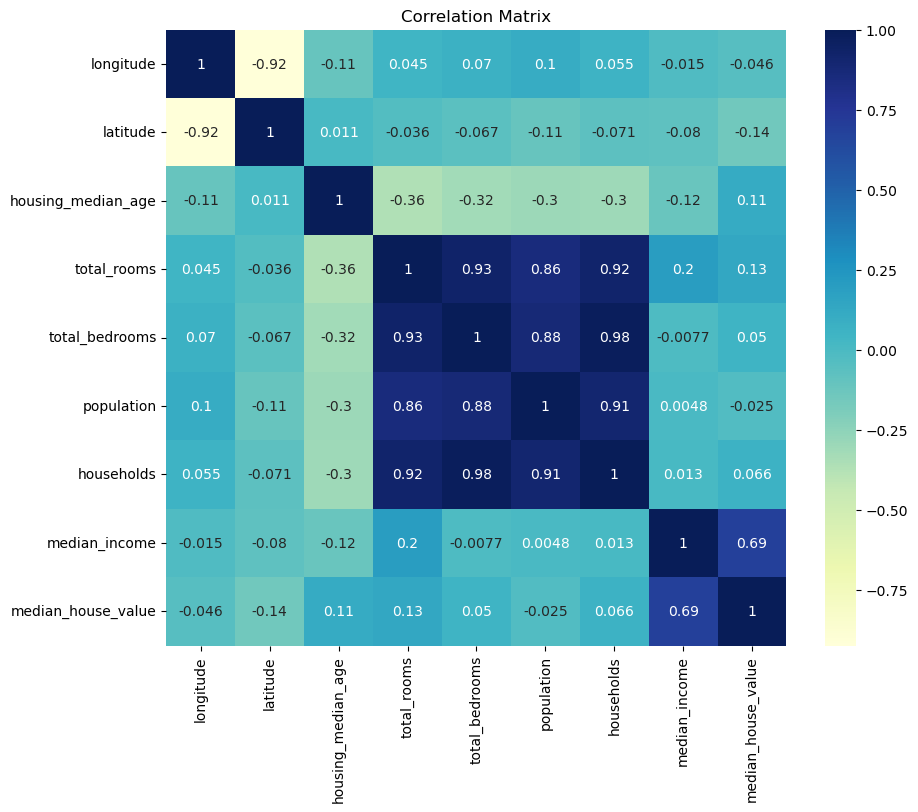

In [10]:
## Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(housing_df.drop(columns=["ocean_proximity"]).corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()


Data Preprocessing

In [11]:
## Fill missing values in total_bedrooms with the median
housing_df['total_bedrooms'].fillna(housing_df['total_bedrooms'].median(), inplace=True)

In [12]:
## Separate features and target variable
X = housing_df.drop("median_house_value", axis=1)
y = housing_df["median_house_value"]

In [13]:
## Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
## Define a preprocessor to handle numeric and categorical features
numeric_features = ["longitude", "latitude", "housing_median_age", "total_rooms", 
                    "total_bedrooms", "population", "households", "median_income"]
categorical_features = ["ocean_proximity"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(), categorical_features)
    ])


In [15]:
## Create a pipeline for Linear Regression
linear_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

In [16]:
## Create a pipeline for Decision Tree Regression
tree_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", DecisionTreeRegressor(random_state=42))
])

Model Training and Evaluation

In [17]:
## Train the Linear Regression model
linear_pipeline.fit(X_train, y_train)
y_pred_linear = linear_pipeline.predict(X_test)

In [18]:
## Train the Decision Tree model
tree_pipeline.fit(X_train, y_train)
y_pred_tree = tree_pipeline.predict(X_test)

In [19]:
## Define evaluation function
def evaluate_model(y_true, y_pred, model_name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}")

In [20]:
## Evaluate both models
evaluate_model(y_test, y_pred_linear, "Linear Regression")
evaluate_model(y_test, y_pred_tree, "Decision Tree Regression")

Linear Regression - MAE: 50670.74, RMSE: 70060.52
Decision Tree Regression - MAE: 43550.40, RMSE: 69078.77


Visualizing Model Performance

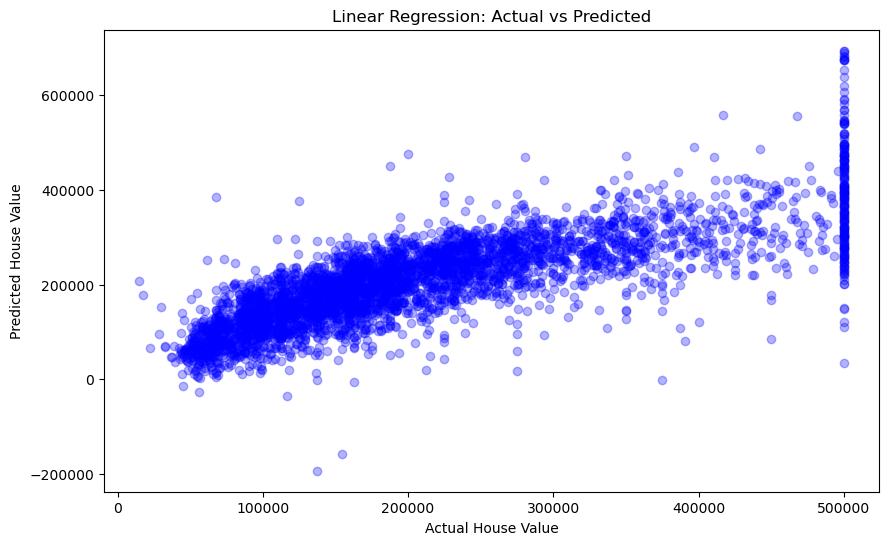

In [21]:
## Scatter plot to visualize predictions vs actual values for linear regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.3, color='blue')
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

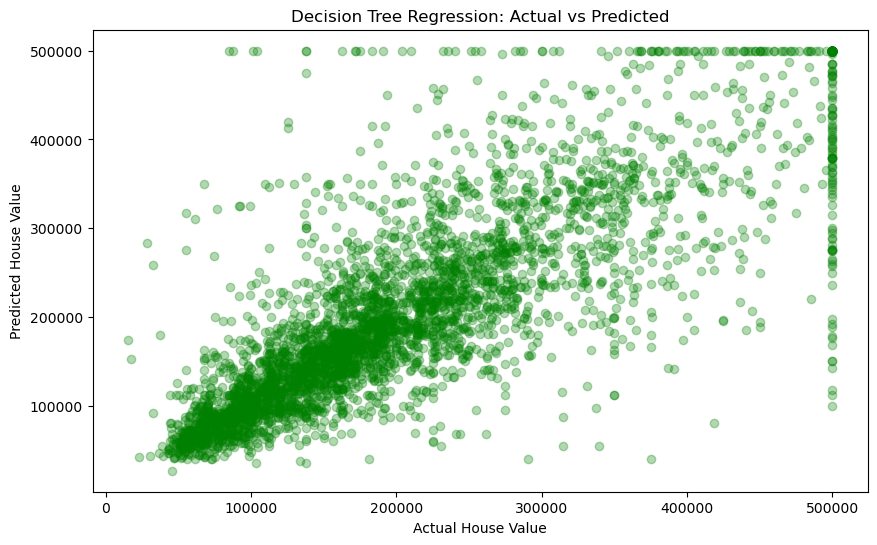

In [22]:
## Scatter plot for Decision Tree predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tree, alpha=0.3, color='green')
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Decision Tree Regression: Actual vs Predicted")
plt.show()